<a href="https://colab.research.google.com/github/nshkwon/Side-ML-Projects/blob/main/nlp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews?select=test.ft.txt.bz2

In [ ]:


# Load the dataset
dataset = pd.read_csv('/content/train.ft.txt', delimiter='\t', quoting=3, header=None, names=['text'])

# Split text into label and review columns only if not done already
if 'label' not in dataset.columns or 'review' not in dataset.columns:
    dataset[['label', 'review']] = dataset['text'].str.split(pat=' ', n=1, expand=True)
    dataset['label'] = dataset['label'].map({'__label__1': 0, '__label__2': 1})
    dataset.drop(columns=['text'], inplace=True)

# Check if there are any rows that weren't correctly processed
print("Rows with unprocessed labels:", dataset[dataset['label'].isnull()].shape[0])

Rows with unprocessed labels: 0


In [ ]:
dataset.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
dataset.shape

(27977, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   27977 non-null  int64 
 1   review  27977 non-null  object
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

In [ ]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [ ]:
#dataset.dropna(inplace=True)

In [ ]:
#dataset.isnull().values.any()

In [ ]:
dataset.shape

(27977, 2)

In [ ]:
dataset.describe()

,label
count,27977.000000
mean,0.513851
std,0.499817
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

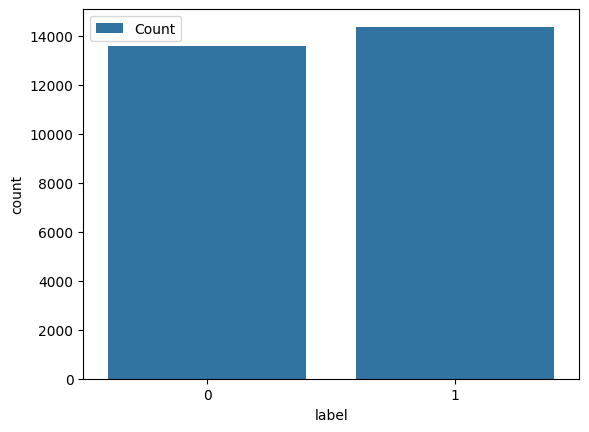

In [ ]:
sns.countplot(data=dataset, x=dataset.label, label='Count')
plt.show

In [ ]:
(dataset.label == 1).sum()

14376

In [ ]:
(dataset.label == 0).sum()

13601

# Data preprocessing

In [ ]:
sentences = dataset['review'].tolist()
labels = dataset['label'].tolist()

In [ ]:
sentences[:3]

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
 "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
 'Amazing!: This soundtrack is my favorite music of all

In [ ]:
labels[:3]

[1, 1, 1]

In [ ]:
dataset[:3]

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...


# Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42)

# Tokenizer

In [ ]:
vocab_size = 1000
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

In [ ]:
tokenizer.fit_on_texts(train_sentences)

In [ ]:
for key, value in tokenizer.word_index.items():
    print('{}  \t======>\t {}'.format(key, value))
    if value == 25:
        break

<OOV>  	======>	 1
the  	======>	 2
and  	======>	 3
i  	======>	 4
a  	======>	 5
to  	======>	 6
of  	======>	 7
it  	======>	 8
this  	======>	 9
is  	======>	 10
in  	======>	 11
for  	======>	 12
that  	======>	 13
was  	======>	 14
not  	======>	 15
you  	======>	 16
book  	======>	 17
but  	======>	 18
with  	======>	 19
on  	======>	 20
have  	======>	 21
my  	======>	 22
as  	======>	 23
are  	======>	 24
one  	======>	 25


In [ ]:
len(tokenizer.word_index)

52144

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index['stunning']

2272

In [ ]:
word_index['gamer']

11090

## sentences to tokens

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)

In [ ]:
train_sequences[3]

[1, 630, 7, 5, 163, 125, 91, 2, 205, 14, 211, 441, 1, 22, 1, 31, 753, 1]

In [ ]:
train_sentences[3]

'Toxicity--System of a Down Music CD: The price was right. Fast delivery. My sons like. Thanks. Colleen'

In [ ]:
word_index['system'], word_index['of'], word_index['a'], word_index['down'], word_index['music'], word_index['cd']

(630, 7, 5, 163, 125, 91)

## length of the sequence

In [ ]:
max_length = 200
trunc_type='post'
padding_type='post'


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
train_padded.shape

(22381, 200)

In [ ]:
train_padded[0]

array([ 30,  34,  33, 107,  37,   5,   1,  14, 158, 145, 109,   1,   4,
       820,  34, 387,  19,   9, 391, 386, 896,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## label to numpy array

In [ ]:
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

In [ ]:
type(train_labels)

numpy.ndarray

# embedding layer

In [ ]:
embedding_dim = 16

In [ ]:
sample = np.array(train_padded[0])
sample

array([ 30,  34,  33, 107,  37,   5,   1,  14, 158, 145, 109,   1,   4,
       820,  34, 387,  19,   9, 391, 386, 896,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.models import Sequential


x = Embedding(vocab_size, embedding_dim, input_length=max_length)
x(sample)[0]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 0.01041632, -0.02581568,  0.03089707, -0.00277717, -0.04578073,
       -0.00790431, -0.0431281 , -0.0093485 ,  0.03691294, -0.007307  ,
       -0.03263699, -0.01839217,  0.00127012,  0.02672615, -0.04184101,
        0.04102698], dtype=float32)>

# Model building

In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           16000     
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          41472     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
epochs=10

In [ ]:
history = model.fit(train_padded, train_labels,
                    validation_data=(validation_padded, validation_labels),
                    epochs=epochs)

Epoch 1/10
700/700 [==============================] - 345s 492ms/step - loss: 0.3321 - acc: 0.8599 - val_loss: 0.3228 - val_acc: 0.8642
Epoch 2/10
700/700 [==============================] - 339s 484ms/step - loss: 0.2973 - acc: 0.8775 - val_loss: 0.3174 - val_acc: 0.8642
Epoch 3/10
700/700 [==============================] - 330s 472ms/step - loss: 0.2806 - acc: 0.8863 - val_loss: 0.2968 - val_acc: 0.8790
Epoch 4/10
700/700 [==============================] - 320s 457ms/step - loss: 0.2663 - acc: 0.8934 - val_loss: 0.2986 - val_acc: 0.8763
Epoch 5/10
700/700 [==============================] - 322s 460ms/step - loss: 0.2611 - acc: 0.8955 - val_loss: 0.3127 - val_acc: 0.8769
Epoch 6/10
700/700 [==============================] - 322s 461ms/step - loss: 0.2490 - acc: 0.9005 - val_loss: 0.3032 - val_acc: 0.8738
Epoch 7/10
700/700 [==============================] - 320s 458ms/step - loss: 0.2377 - acc: 0.9057 - val_loss: 0.2991 - val_acc: 0.8803
Epoch 8/10
700/700 [============================

# error visulaisation

In [ ]:
import matplotlib.pyplot as plt

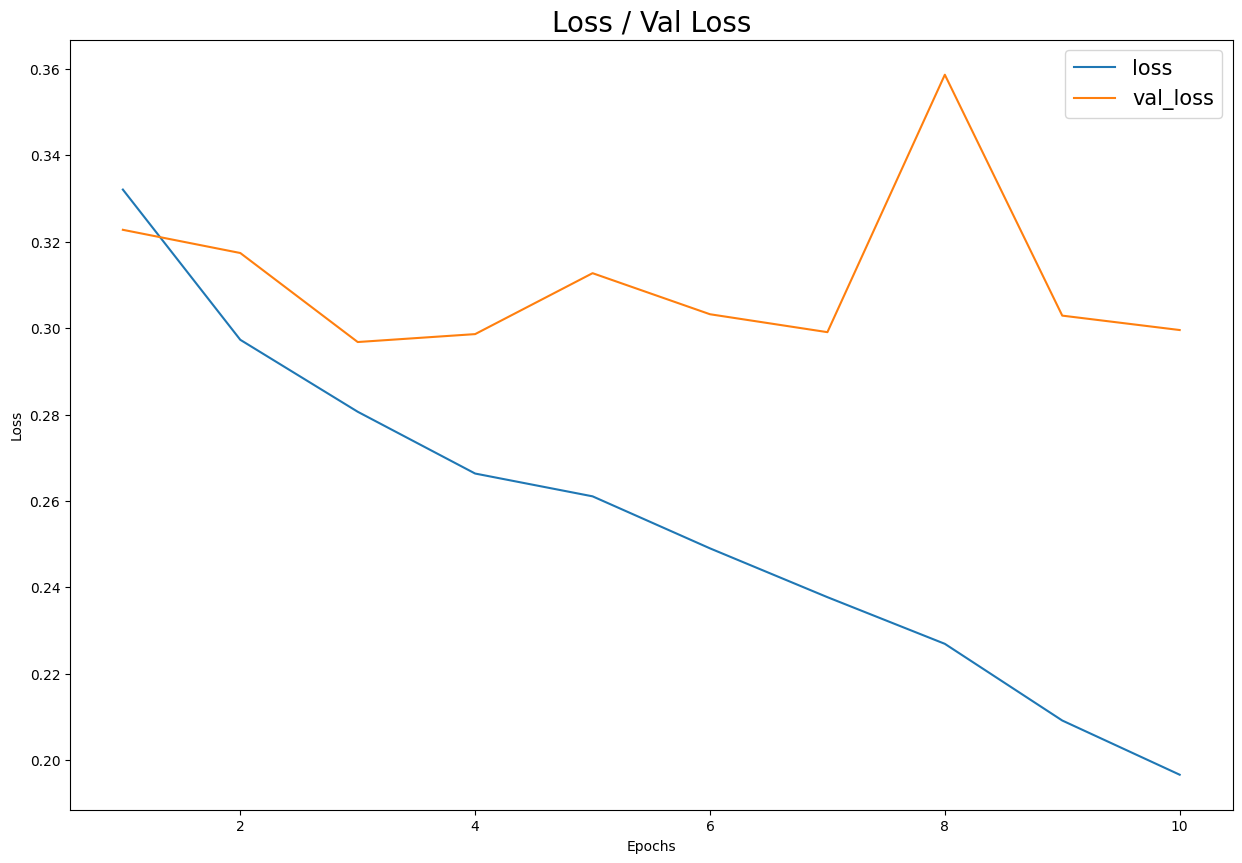

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(1, epochs+1), history.history['loss'])
plt.plot(np.arange(1, epochs+1), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

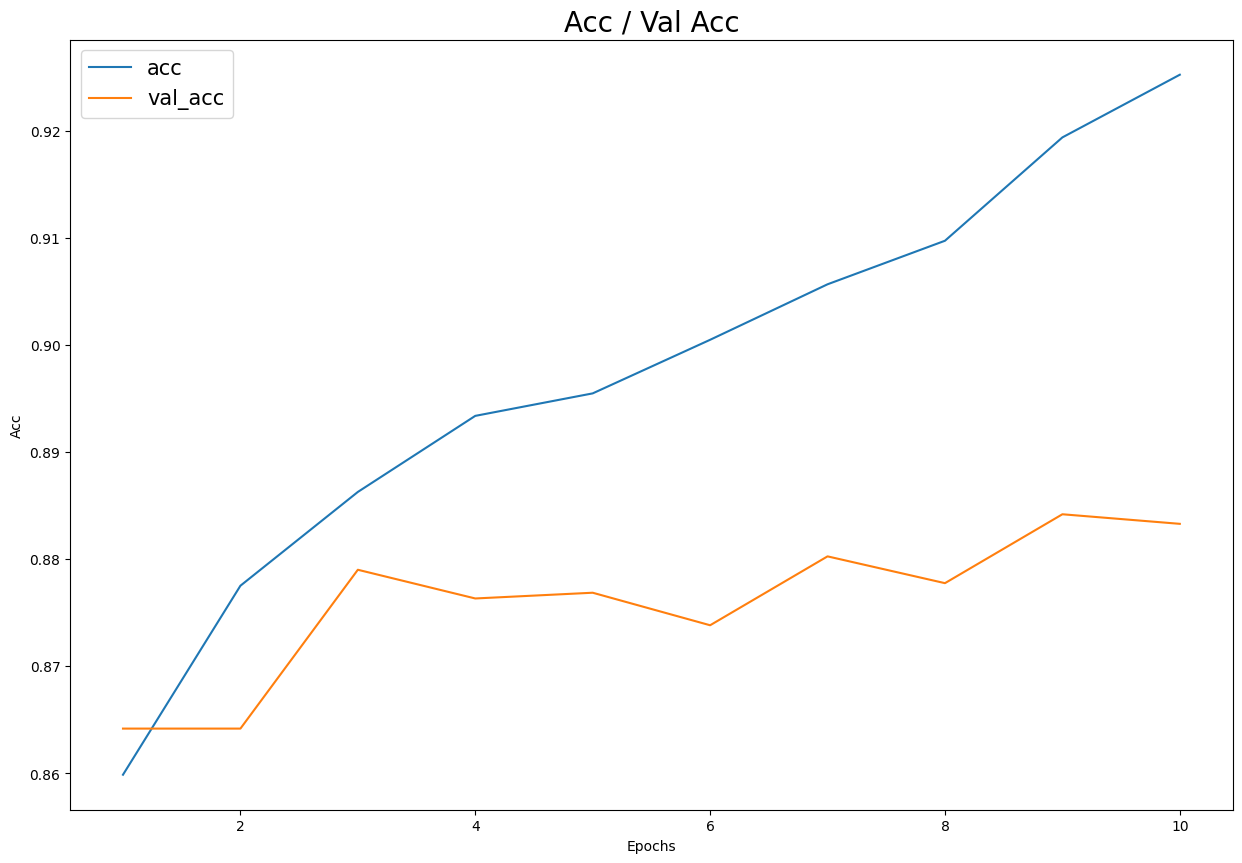

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(1, epochs+1), history.history['acc'])
plt.plot(np.arange(1, epochs+1), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()